## Setup

In [1]:
! pip3 install investpy
! pip3 install stockstats
! pip3 install ta
! pip3 install eod

import datetime as dt
from datetime import date
import investpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statistics
import stockstats
from stockstats import StockDataFrame
import ta
import time


In [ ]:
# FIXME: https://towardsdatascience.com/a-simple-way-to-get-a-stocks-fundamental-data-26506adf1214

# Libraries
from eod import EodHistoricalData
from functools import reduce
from datetime import datetime, timedelta# Importing and assigning the api key
with open("../eodHistoricalData-API.txt", "r") as f:
    api_key = f.read()
    
# EOD Historical Data client
client = EodHistoricalData(api_key)

def getFundamentals(ticker):
    """
    Returns the fundamental data from the financial data API.  Combines the quarterly balance 
    sheet, cash flow, income statement, and earnings for a specific stock ticker.
    """
    
    # Getting data
    fund_data = client.get_fundamental_equity(ticker)
    
    # Financials
    bal = pd.DataFrame(fund_data['Financials']['Balance_Sheet']['quarterly']).T
    
    cf = pd.DataFrame(fund_data['Financials']['Cash_Flow']['quarterly']).T
    
    inc = pd.DataFrame(fund_data['Financials']['Income_Statement']['quarterly']).T
    
    # Earnings
    earn = pd.DataFrame(fund_data['Earnings']['History']).T
    
    # Merging them together
    df = reduce(
        lambda left,right: pd.merge(
            left,
            right,
            left_index=True, 
            right_index=True, 
            how='outer',
            suffixes=('', '_drop')
        ), 
        [bal, cf, inc, earn]
    )
    
    # Dropping redundant date and duplicate columns
    dup_cols = [i for i in df.columns if "date" in i or "Date" in i or "_drop" in i]
    
    df = df.drop(dup_cols, axis=1)
    
    return df

In [ ]:
stock = investpy.get_stock_historical_data(stock='NVDA', country='United States', from_date='31/12/2019', to_date=date.today().strftime("%d/%m/%Y"))
stock = StockDataFrame(stock)
stock.columns = stock.columns.str.lower()

stock[['close_10_sma', 'close_20_sma', 'close_50_sma', 'rsi_14', 'macd', 'macds']]
# stock = stock.dropna().iloc[1: , :]
stock

,open,high,low,close,volume,currency,close_10_sma,close_20_sma,close_50_sma,close_-1_s,close_-1_d,rs_14,rsi_14,macd,macds,macdh
Date,,,,,,,,,,,,,,,,
2019-12-31,57.73,58.92,57.53,58.83,23121132,USD,58.830000,58.830000,58.830000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2020-01-02,59.69,59.98,59.18,59.98,23767876,USD,59.405000,59.405000,59.405000,58.83,1.15,inf,100.000000,0.025801,0.014334,0.011467
2020-01-03,58.77,59.46,58.52,59.02,20577232,USD,59.276667,59.276667,59.276667,59.98,-0.96,1.112351,52.659387,0.003106,0.009733,-0.006626
2020-01-06,58.08,59.32,57.82,59.27,26291248,USD,59.275000,59.275000,59.275000,59.02,0.25,1.392800,58.207956,0.001734,0.007023,-0.005289
2020-01-07,59.55,60.44,59.10,59.98,31920576,USD,59.416000,59.416000,59.416000,59.27,0.71,2.250542,69.235895,0.029205,0.013622,0.015583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,322.43,330.88,319.05,329.85,53386664,USD,305.849000,283.535000,242.375800,316.75,13.10,3.476565,77.661445,22.431965,20.722132,1.709833
2021-11-22,335.17,346.47,319.00,319.56,72426464,USD,307.001000,287.930000,244.336600,329.85,-10.29,2.362014,70.255927,22.366763,21.051059,1.315705
2021-11-23,315.35,323.60,308.80,317.46,53037772,USD,308.090000,291.444500,246.237400,319.56,-2.10,2.206543,68.813766,21.893266,21.219500,0.673766


In [ ]:
# Apple stock will be saved at search_result
stock_info = investpy.search_quotes(text='NVDA', countries=['united states'], n_results=1)
# Save the information in a dict variable
stock_info = stock_info.retrieve_information()
print(stock_info)

{'prevClose': 326.74, 'dailyRange': '313.5-327.1', 'revenue': 24270000000, 'open': 326, 'weekRange': '115.67-346.47', 'eps': 3.24, 'volume': 27538284, 'marketCap': 787570000000, 'dividend': '0.16(0.05%)', 'avgVolume': 31801547, 'ratio': 97.25, 'beta': 1.39, 'oneYearReturn': '137.56%', 'sharesOutstanding': 2500000000, 'nextEarningDate': '17/02/2022'}


## Technical analysis
Futher information [here](https://medium.com/codex/this-python-library-will-help-you-get-stock-technical-indicators-in-one-line-of-code-c11ed2c8e45f) (stockstats) and [here](https://towardsdatascience.com/technical-analysis-library-to-financial-datasets-with-pandas-python-4b2b390d3543) (ta).

### SMA

In [ ]:
# Mostrar tres medias móviles (de 10, 20 y 50 periodos), RSI (14 periodos) and MACD
# Quitar la fila donde el RSI es 0 (valor anómalo).
stock[['close_10_sma', 'close_20_sma', 'close_50_sma', 'rsi_14', 'macd', 'macds']].dropna().iloc[1: , :]
# stock = stock.dropna().iloc[1: , :]
stock

,open,high,low,close,volume,currency,close_10_sma,close_20_sma,close_50_sma,close_-1_s,close_-1_d,rs_14,rsi_14,macd,macds,macdh
Date,,,,,,,,,,,,,,,,
2019-01-04,32.73,34.43,32.42,34.05,58561932,USD,33.370000,33.370000,33.370000,32.00,2.05,1.380407,57.990384,0.003648,-0.007542,0.011190
2019-01-07,34.62,36.22,34.11,35.85,70915920,USD,33.866000,33.866000,33.866000,34.05,1.80,2.398736,70.577298,0.101315,0.024840,0.076475
2019-01-08,36.67,36.70,34.23,34.96,78601712,USD,34.048333,34.048333,34.048333,35.85,-0.89,1.555360,60.866575,0.120065,0.050651,0.069413
2019-01-09,35.48,36.12,34.97,35.65,61725900,USD,34.277143,34.277143,34.277143,34.96,0.69,1.848911,64.898862,0.161279,0.078648,0.082631
2019-01-10,35.45,36.40,34.84,36.31,52315624,USD,34.531250,34.531250,34.531250,35.65,0.66,2.151297,68.267032,0.217711,0.112068,0.105643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,322.43,330.88,319.05,329.85,53386664,USD,305.849000,283.535000,242.375800,316.75,13.10,3.476565,77.661445,22.431965,20.722132,1.709833
2021-11-22,335.17,346.47,319.00,319.56,72426464,USD,307.001000,287.930000,244.336600,329.85,-10.29,2.362014,70.255927,22.366763,21.051059,1.315705
2021-11-23,315.35,323.60,308.80,317.46,53037772,USD,308.090000,291.444500,246.237400,319.56,-2.10,2.206543,68.813766,21.893266,21.219500,0.673766


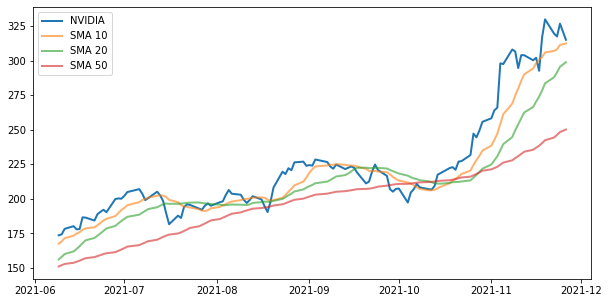

In [ ]:
# Plot size in inches
plt.rcParams['figure.figsize'] = [10, 5]

# Plot the last 90 periods
plt.plot(stock.iloc[-120:]['close'], linewidth = 2, label = 'NVIDIA')
plt.plot(stock.iloc[-120:]['close_10_sma'], linewidth = 2, alpha = 0.6, label = 'SMA 10')
plt.plot(stock.iloc[-120:]['close_20_sma'], linewidth = 2, alpha = 0.6, label = 'SMA 20')
plt.plot(stock.iloc[-120:]['close_50_sma'], linewidth = 2, alpha = 0.6, label = 'SMA 50')
plt.legend(loc = 'upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


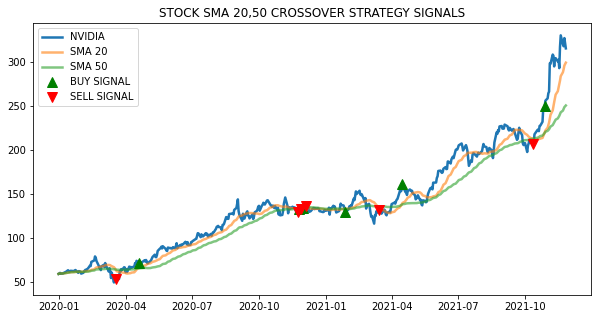

In [ ]:
# stock['close_50_sma_xd_close_20_sma']

# Detect where the signals cross each other.
# Create buy and sell signals by close price, SMA_50 and SMA_20.
# This could be interesting for testing methods

buy_signals = stock['close_50_sma_xd_close_20_sma']
sell_signals = stock['close_20_sma_xd_close_50_sma']

# buy_signals = stock['close_20_sma_xu_close_50_sma']
# sell_signals = stock['close_50_sma_xu_close_20_sma']


for i in range(len(buy_signals)):
    if buy_signals.iloc[i] == True:
        buy_signals.iloc[i] = stock.close[i]
    else:
        buy_signals.iloc[i] = np.nan

for i in range(len(sell_signals)):    
    if sell_signals.iloc[i] == True:
        sell_signals.iloc[i] = stock.close[i]
    else:
        sell_signals.iloc[i] = np.nan


plt.rcParams['figure.figsize'] = [10, 5]

# Plot stock, indicators and signals
plt.plot(stock['close'], linewidth = 2.5, label = 'NVIDIA')
plt.plot(stock['close_20_sma'], linewidth = 2.5, alpha = 0.6, label = 'SMA 20')
plt.plot(stock['close_50_sma'], linewidth = 2.5, alpha = 0.6, label = 'SMA 50')
plt.plot(stock.index, buy_signals, marker = '^', markersize = 10, color = 'green', linewidth = 0, label = 'BUY SIGNAL')
plt.plot(stock.index, sell_signals, marker = 'v', markersize = 10, color = 'r', linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('STOCK SMA 20,50 CROSSOVER STRATEGY SIGNALS')
plt.style.use('bmh')
plt.show()

#### Statistical analysis

In [ ]:
buy_signals.dropna()
# type(buy_signals.dropna())
buy_signals.index[0]==buy_signals.index[1]
# Integrar en un mismo dataset?
# bs_signals
type(buy_signals.dropna())
pd.concat([buy_signals.dropna(), sell_signals.dropna()])

In [ ]:
buy_signals = pd.Series(buy_signals.dropna(), name="Price").to_frame()
buy_signals['Type'] = 1
sell_signals = pd.Series(sell_signals.dropna(), name="Price").to_frame()
sell_signals['Type'] = 0

bs_signals = pd.concat([buy_signals, sell_signals]).sort_values(by='Date')
# Create a new list that have the differences between buy and sell signals. Then, mean and std could be really interesting!

bs_signals.reset_index(level=0, inplace=True)
bs_signals

In [ ]:
# Si hay más señales de compra que de venta (a fecha de hoy)
if bs_signals.loc[bs_signals['Type']==1].shape[0]>bs_signals.loc[bs_signals['Type']==0].shape[0]:
  diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price)
# Si hay más señales de venta que de compra (a fecha de hoy)
elif bs_signals.loc[bs_signals['Type']==1].shape[0]<bs_signals.loc[bs_signals['Type']==0].shape[0]:
  diff_signals = np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
# Si hay la misma cantidad de señales de compra que de venta
else:
  diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price)-np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)

diff_signals

In [ ]:
print(diff_signals.mean())
print(diff_signals.std())
print(stats.ttest_ind(diff_signals, np.zeros(diff_signals.shape), equal_var=False))

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(data=diff_signals)
plt.axhline(y=0, linewidth=1, linestyle='dashed', color='green')
# plt.figure(figsize=(5,5))

plt.subplot(1,2,2)
sns.pointplot(data=diff_signals, capsize=0.05, ci=95, join=0)
plt.axhline(y=0, linewidth=1, linestyle='dashed', color='green')
# props = dict(boxstyle='round', facecolor='white', lw=0.5)
# plt.text(0.85,5400,'Mean:4504.3''\n''n:731' '\n' 't:1.601' '\n' 'Pval.:0.110', bbox=props)
# plt.figure(figsize=(5,5))
plt.tight_layout()

## MACD

In [ ]:
stock.dropna().iloc[1:,:].rsi_14.mean()

58.60712171505501

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


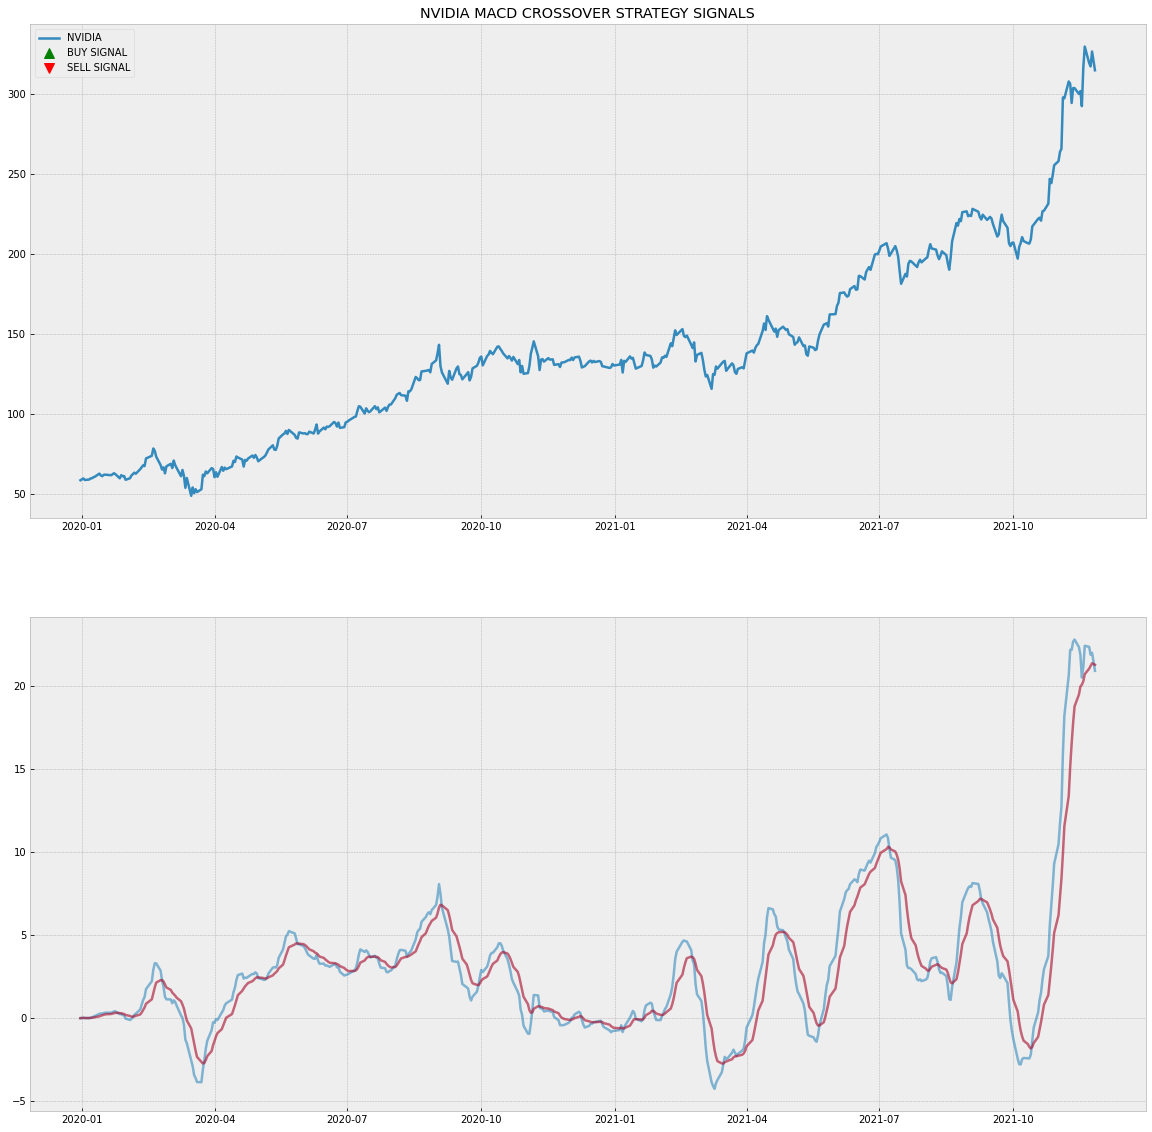

In [ ]:
buy_signals = stock['macds_xd_macd']
sell_signals = stock['macd_xd_macds']

for i in range(len(buy_signals)):
  if buy_signals.iloc[i] == True:
  # if buy_signals.iloc[i] == True and stock.rsi_14[i] < (stock.dropna().iloc[1:,:].rsi_14.mean() - stock['rsi_14'].std()):
    buy_signals.iloc[i] = stock.close[i]
  else:
    buy_signals.iloc[i] = np.nan

for i in range(len(sell_signals)):
  # if sell_signals.iloc[i] == True and stock.rsi_14[i] > (stock.dropna().iloc[1:,:].rsi_14.mean() + stock['rsi_14'].std()):
  if sell_signals.iloc[i] == True:
    sell_signals.iloc[i] = stock.close[i]
  else:
    sell_signals.iloc[i] = np.nan

fig, ax = plt.subplots(2, 1, figsize=(20,20))
plt.subplot(2,1,1)
plt.rcParams['figure.figsize'] = [10, 5]

# Plot stock, indicators and signals
plt.plot(stock['close'], linewidth = 2.5, label = 'NVIDIA')
plt.plot(stock.index, buy_signals, marker = '^', markersize = 10, color = 'green', linewidth = 0, label = 'BUY SIGNAL')
plt.plot(stock.index, sell_signals, marker = 'v', markersize = 10, color = 'r', linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('NVIDIA MACD CROSSOVER STRATEGY SIGNALS')
plt.style.use('bmh')


plt.subplot(2,1,2)
plt.plot(stock['macd'], linewidth = 2.5, alpha = 0.6, label = 'MACD')
plt.plot(stock['macds'], linewidth = 2.5, alpha = 0.6, label = 'MACD_SIGNAL')


plt.style.use('bmh')
plt.show()

#### Statistical analysis

In [ ]:
buy_signals.dropna()
# type(buy_signals.dropna())
buy_signals.index[0]==buy_signals.index[1]
# Integrar en un mismo dataset?
# bs_signals
type(buy_signals.dropna())
pd.concat([buy_signals.dropna(), sell_signals.dropna()])

In [ ]:
buy_signals = pd.Series(buy_signals.dropna(), name="Price").to_frame()
buy_signals['Type'] = 1
sell_signals = pd.Series(sell_signals.dropna(), name="Price").to_frame()
sell_signals['Type'] = 0

bs_signals = pd.concat([buy_signals, sell_signals]).sort_values(by='Date')
# Create a new list that have the differences between buy and sell signals. Then, mean and std could be really interesting!

bs_signals.reset_index(level=0, inplace=True)
bs_signals

In [ ]:
# Si hay más señales de compra que de venta (a fecha de hoy)
if bs_signals.loc[bs_signals['Type']==1].shape[0]>bs_signals.loc[bs_signals['Type']==0].shape[0]:
  diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price)
# Si hay más señales de venta que de compra (a fecha de hoy)
elif bs_signals.loc[bs_signals['Type']==1].shape[0]<bs_signals.loc[bs_signals['Type']==0].shape[0]:
  diff_signals = np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
# Si hay la misma cantidad de señales de compra que de venta
else:
  diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price)-np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)

diff_signals

In [ ]:
print(diff_signals.mean())
print(diff_signals.std())
print(stats.ttest_ind(diff_signals, np.zeros(diff_signals.shape), equal_var=False))

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(data=diff_signals)
plt.axhline(y=0, linewidth=1, linestyle='dashed', color='green')
# plt.figure(figsize=(5,5))

plt.subplot(1,2,2)
sns.pointplot(data=diff_signals, capsize=0.05, ci=95, join=0)
plt.axhline(y=0, linewidth=1, linestyle='dashed', color='green')
# props = dict(boxstyle='round', facecolor='white', lw=0.5)
# plt.text(0.85,5400,'Mean:4504.3''\n''n:731' '\n' 't:1.601' '\n' 'Pval.:0.110', bbox=props)
# plt.figure(figsize=(5,5))
plt.tight_layout()

In [ ]:
getFundamentals('NVDA')

In [10]:
stock_list = investpy.stocks.get_stocks_list(country='united states')
macd_list = []

for stock_name in stock_list[0:100]:
    stock = investpy.get_stock_historical_data(stock=stock_name, country='United States', from_date='31/12/2019', to_date=date.today().strftime("%d/%m/%Y"))
    stock = StockDataFrame(stock)
    stock.columns = stock.columns.str.lower()
    
buy_signals = stock['macds_xd_macd']
sell_signals = stock['macd_xd_macds']


for i in range(len(buy_signals)):
    if buy_signals.iloc[i] == True:
        # if buy_signals.iloc[i] == True and stock.rsi_14[i] < (stock.dropna().iloc[1:,:].rsi_14.mean() - stock['rsi_14'].std()):
        buy_signals.iloc[i] = stock.close[i]
    else:
        buy_signals.iloc[i] = np.nan

for i in range(len(sell_signals)):
    # if sell_signals.iloc[i] == True and stock.rsi_14[i] > (stock.dropna().iloc[1:,:].rsi_14.mean() + stock['rsi_14'].std()):
    if sell_signals.iloc[i] == True:
        sell_signals.iloc[i] = stock.close[i]
        else:
            sell_signals.iloc[i] = np.nan
    
buy_signals.dropna()
# type(buy_signals.dropna())
buy_signals.index[0]==buy_signals.index[1]
  # Integrar en un mismo dataset?
  # bs_signals
  # type(buy_signals.dropna())
pd.concat([buy_signals.dropna(), sell_signals.dropna()])

buy_signals = pd.Series(buy_signals.dropna(), name="Price").to_frame()
buy_signals['Type'] = 1
sell_signals = pd.Series(sell_signals.dropna(), name="Price").to_frame()
sell_signals['Type'] = 0

bs_signals = pd.concat([buy_signals, sell_signals]).sort_values(by='Date')
  # Create a new list that have the differences between buy and sell signals. Then, mean and std could be really interesting!

bs_signals.reset_index(level=0, inplace=True)
  # bs_signals

    # Si hay más señales de compra que de venta (a fecha de hoy)
if bs_signals.loc[bs_signals['Type']==1].shape[0]>bs_signals.loc[bs_signals['Type']==0].shape[0]:
    diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price)
  # Si hay más señales de venta que de compra (a fecha de hoy)
elif bs_signals.loc[bs_signals['Type']==1].shape[0]<bs_signals.loc[bs_signals['Type']==0].shape[0]:
    diff_signals = np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
  # Si hay la misma cantidad de señales de compra que de venta
else:
    diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price)-np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
  

print(stock_name)
print(diff_signals.mean())
print(diff_signals.std())
result = stats.ttest_ind(diff_signals, np.zeros(diff_signals.shape), equal_var=False)
print(result)
print("\n")

if result[1] < 0.05:
    macd_list.append(True)
else:
    macd_list.append(False)
    
time.sleep(10)

BA
11.957857142857149
39.28026752501483
Ttest_indResult(statistic=1.097616431603682, pvalue=0.292286809951656)


GM
-0.10222222222222221
3.5964080159631435
Ttest_indResult(statistic=-0.11719277057464506, pvalue=0.9080807326304992)


CVX
1.4299999999999988
8.781391546901892
Ttest_indResult(statistic=0.6306934562131623, pvalue=0.5377324353512679)


C
0.9531578947368413
7.844263779235573
Ttest_indResult(statistic=0.515524028674819, pvalue=0.6124606969182984)


BAC
-0.047058823529412014
2.717227749674034
Ttest_indResult(statistic=-0.069274757752724, pvalue=0.945629326941638)


T
-0.4844444444444445
0.8027606687911564
Ttest_indResult(statistic=-3.077120954609793, pvalue=0.004876603046828326)


CAT
-3.59
10.267793092967933
Ttest_indResult(statistic=-1.6767999717956952, pvalue=0.1071226822716328)


INTC
-0.32409090909090854
4.420220746329418
Ttest_indResult(statistic=-0.33599478582363485, pvalue=0.7402087418602079)


MSFT
-3.6076190476190497
8.528997543262072
Ttest_indResult(statistic=-1.8916

C:\Users\amaia\AppData\Local\Temp/ipykernel_11460/3202800083.py:56: RuntimeWarning: Mean of empty slice.
  print(diff_signals.mean())


ZeroDivisionError: division by zero

In [9]:
stock_list[4:10]

['BAC', 'T', 'CAT', 'INTC', 'MSFT', 'AA']